In [35]:
# !pip install pandas 
# !pip install statsmodels
# !pip install scikit-learn
import pandas as pd
import sklearn.metrics as sm
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('/Users/naray/Desktop/NFLX.csv', parse_dates=["Date"], index_col = ["Date"])
#https://goodboychan.github.io/python/datacamp/visualization/2020/06/26/02-Plotting-time-series.html

In [37]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [38]:
covid = df["2020-01-10":"2022-01-02"];
print(covid) #SO COOL! prices shot up like crazy during lockdown

                  Open        High         Low       Close   Adj Close   
Date                                                                     
2020-01-10  337.130005  338.500000  327.269989  329.049988  329.049988  \
2020-01-13  331.799988  340.850006  331.510010  338.920013  338.920013   
2020-01-14  344.399994  345.380005  335.519989  338.690002  338.690002   
2020-01-15  338.679993  343.170013  336.600006  339.070007  339.070007   
2020-01-16  343.500000  343.559998  335.850006  338.619995  338.619995   
...                ...         ...         ...         ...         ...   
2021-12-27  615.000000  615.000000  609.250000  613.119995  613.119995   
2021-12-28  614.950012  618.409973  609.690002  610.710022  610.710022   
2021-12-29  610.710022  613.979980  604.679993  610.539978  610.539978   
2021-12-30  612.989990  620.609985  611.239990  612.090027  612.090027   
2021-12-31  610.010010  614.080017  602.049988  602.440002  602.440002   

             Volume  
Date           

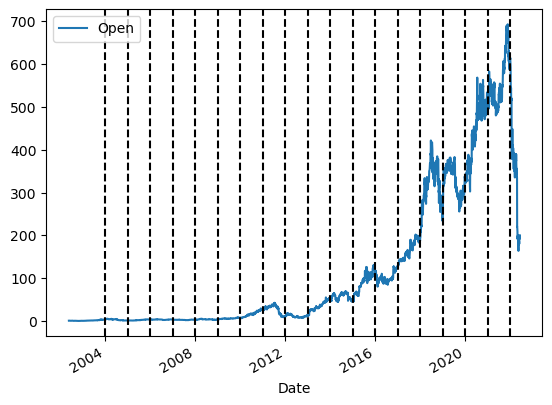

In [39]:
df[['Open']].plot() #why do prices fall in 2022?

xcoords = ['2004-01-01', '2005-01-01','2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
          '2010-01-01', '2011-01-01', '2012-01-01','2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
          '2017-01-01', '2018-01-01', '2019-01-01','2020-01-01', '2021-01-01', '2022-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

Fun facts about competitors:
    
 - HBO Now (video on demand) started 7 April 2015.
 - Disney+ started 12 Nov 2019.
 - Amazon Prime Video started 7 September 2006.
 - Hulu started 12 March 2008 (beta version: 29 October 2007).
 - Netflix IPO was 29 May 2002; sold 5.5 mil shares at USD 15 per share.

In [40]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(df, period = 30)
# result.plot()

#This is giving issues, can't really see how to resolve this right now. Will come back to it.

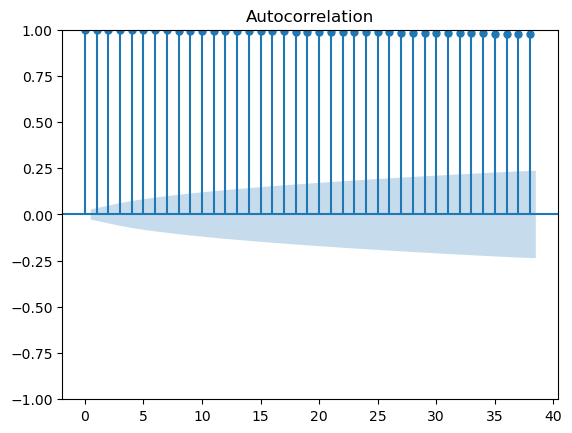

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df[['Open']]);

Autocorrelation function helps see if there is an autocorrelation in the time series.

Basics on autocorrelation: instead of using two different time series data, it uses the same one twice. For example, if it's rainy today, the data suggests that it's more likely to rain tomorrow than if it's clear today. When it comes to investing, a stock might have a strong positive autocorrelation of returns, suggesting that if it's "up" today, it's more likely to be up tomorrow, too.


On the x-axis, we can see the time steps (called the number of lags). On the y-axis, we can see the amount of correlation of every time step with 'present' time. There seems to be significant autocorrelation in this plot.

/Users/naray/.julia/conda/3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


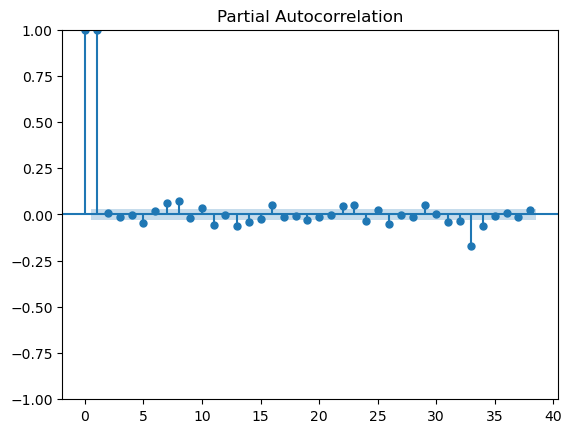

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Open']);

The PACF is an alternative to the ACF. Rather than giving the autocorrelations, it gives you the partial autocorrelation. This autocorrelation is called partial, because with each step back in the past, only additional autocorrelation is listed. This is different from the ACF, as the ACF contains duplicate correlations when variability can be explained by multiple points in time.

For example, If the value of today is the same as the value of yesterday, but also the same as the day-before-yesterday, the ACF would show two highly correlated steps. The PACF would only show yesterday and remove the day before yesterday.

https://neptune.ai/blog/select-model-for-time-series-prediction-task

In [44]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Open'])

(-1.333672665995398,
 0.6136297419105519,
 32,
 5011,
 {'1%': -3.4316556581508197,
  '5%': -2.862116959995152,
  '10%': -2.567077116457145},
 31110.617647806626)

Our test statistic is -1.333, and p-value is 0.613 > 0.05, so we cannot reject our null hypothesis, and we must conclude that our data is non-stationary. That is, our data has some time-dependent structure, and does not have constant variance over time.

In [45]:
adfuller(df['Close'])

(-1.2470207311260328,
 0.6530488146407228,
 32,
 5011,
 {'1%': -3.4316556581508197,
  '5%': -2.862116959995152,
  '10%': -2.567077116457145},
 31269.06920669486)

In [46]:
adfuller(df['High'])

(-1.3065149611308324,
 0.6261864650657883,
 32,
 5011,
 {'1%': -3.4316556581508197,
  '5%': -2.862116959995152,
  '10%': -2.567077116457145},
 30076.514893615647)

In [47]:
adfuller(df['Low'])

(-1.1822758160575146,
 0.6811733622731314,
 22,
 5021,
 {'1%': -3.4316530564249215,
  '5%': -2.8621158105649367,
  '10%': -2.567076504570864},
 30332.5986946857)

In [48]:
adfuller(df['Volume'])

(-4.891267569932603,
 3.626529553954951e-05,
 31,
 5012,
 {'1%': -3.431655397510801,
  '5%': -2.862116844845668,
  '10%': -2.567077055158601},
 178617.6988004139)

<AxesSubplot: xlabel='Date'>

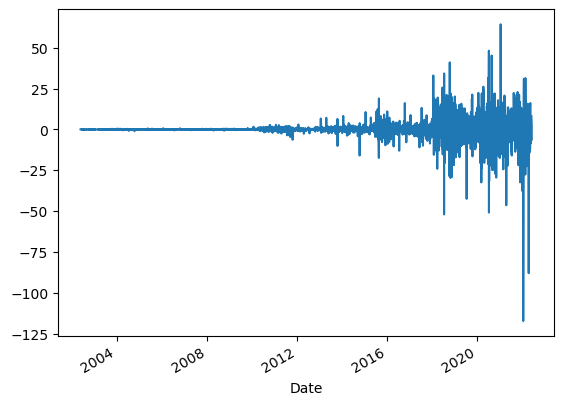

In [49]:
# Let's try differencing - this removes the trend from our time series. The goal: only have seasonal variation 
#(this can be a way to use models that work with seasonality and not trends)

prev_df = df.shift()
differenced_df = df-prev_df
differenced_df['Open'].plot()

In [50]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(differenced_df['Open'].dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -10.547970617606925
ADF p-values: 8.317523956524349e-19
ADF number of lags used: 32
ADF number of observations: 5010
ADF critical values: {'1%': -3.4316559188949403, '5%': -2.8621170751906178, '10%': -2.567077177780168}
ADF best information criterion: 31099.125994498965


### Confused ^: now we say that our differenced data is stationary?? Since the p-value is so small indicating that the $H_1$ is true?

apparently, if it is **not** stationary, then we apply differencing.

# Autoregression 

### Terminology
**Lag variables**: when you take observations from previous time steps as input variables. E.g., time step $t-1$ and $t-2$ look like: $x(t+1) = b_0 + b_1 x(t-1) + b_2 x(t-2)$

**Motivation for name**: since the regression model uses data from the same input variable at previous time steps, we call it self-regression, or, autoregression.

### Assumption
Observations at previous time steps are useful to predict the value at the next time step.


### Idea
We can use correlation statistics to help choose which variables will be useful in a model, and which ones won't.

### Reference
https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

In [51]:
df_open = df.iloc[:, 0] #slice dataframe to give only "open" stock prices

In [52]:
(df_open).head() #view if did the above correctly

Date
2002-05-23    1.156429
2002-05-24    1.214286
2002-05-28    1.213571
2002-05-29    1.164286
2002-05-30    1.107857
Name: Open, dtype: float64

# Quick check for autocorrelation

We can plot the observation at the previous time step $(t-1)$ with the observation at the next time step $(t+1)$ as a scatter plot.

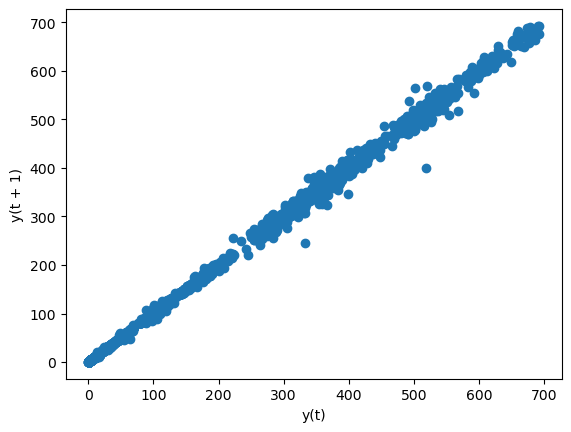

In [53]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(df_open)
pyplot.show() #run opening prices (t) on x-axis against opening prices on previous dat (t-1) on y-axis

Most of the observations fall along the diagonal line of the plot, which shows correlation. We can do the same with lagged observation over days/weeks/months/years.

We could also calculate the correlation between the observation and the lagged variable, like the Pearson correlation coefficient. Let's do that to confirm our guess that there is correlation between opening prices.

In [54]:
from pandas import DataFrame
from pandas import concat
values = DataFrame((df_open).values)
dataframe = concat([values.shift(1), values], axis = 1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999485
t+1  0.999485  1.000000


We see a strong positive correlation (0.99) between the observation and the lag (1) values.

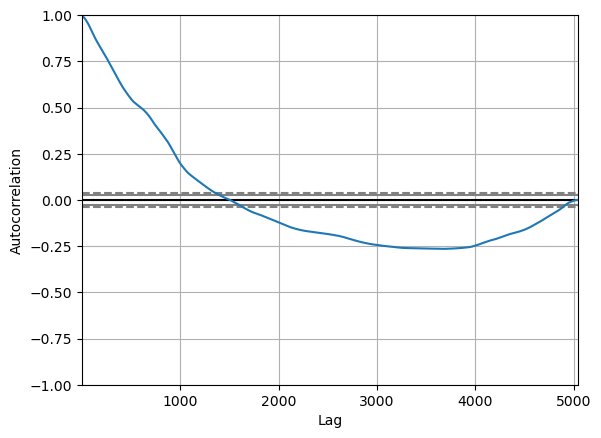

In [55]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_open)
pyplot.show()

Since there is no oscillation, we can conclude that there is no seasonality in the opening stock prices throughout the years. Let's try to plot this as a line plot to confirm our conclusion.

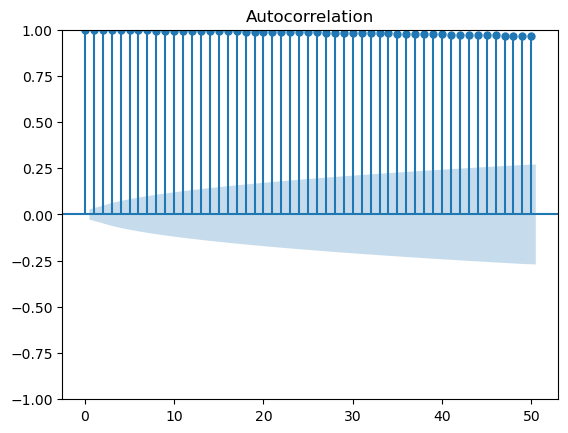

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_open, lags = 50)
pyplot.show()

Lags above are limited to 50 for readability.

# Persistence Model

Let’s say that we want to develop a model to predict the last 7 days of opening prices in the dataset given all prior observations.



Test MSE: 30.323


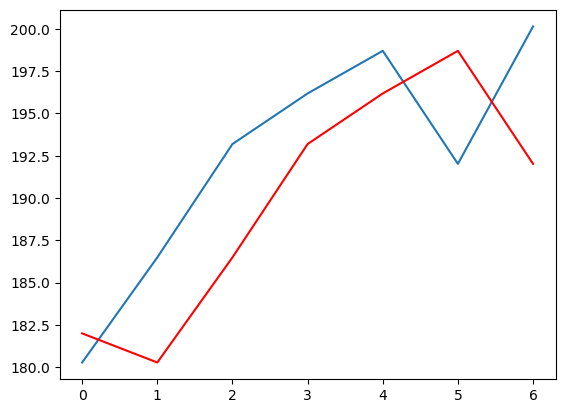

In [65]:
from sklearn.metrics import mean_squared_error

#create the lagged dataset
values = DataFrame((df_open).values)
dataframe = concat([values.shift(1), values], axis = 1)
dataframe.columns = ['t-1', 't+1']

#split into training and testing sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_Y = train[:,0], train[:,1]
test_X, test_Y = test[:,0], test[:,1]

#persistence model
def model_persistence(x):
    return x

#walk-forward validation
predictions = list()
for x in test_X:
    y_hat = model_persistence(x)
    predictions.append(y_hat)
test_score = mean_squared_error(test_Y, predictions)
print('Test MSE: %.3f' % test_score)

#plot predictions vs expected
pyplot.plot(test_Y)
pyplot.plot(predictions, color = 'red')
pyplot.show()

<span style='color:Red'> MSE looks so bad omg it's WAY above 0. </span>

The expected values for the next 7 days of opening stock prices are in blue, compared to the predictions from the model, which are in red.

# Autoregression Model


Coefficients: [ 9.72281218e-02  9.89161906e-01  3.02397897e-02  4.88948204e-03
  1.56370368e-02 -4.56254962e-02 -2.58756751e-02 -4.04268171e-02
  6.57801923e-02 -4.14374080e-02  1.23773005e-01 -7.58242113e-02
  4.78105029e-02  5.90700286e-03 -2.77051423e-02 -5.95140775e-02
  5.66415857e-02 -3.30339282e-03 -1.36796628e-02  9.91794486e-03
 -2.12497204e-02 -6.01100827e-03 -1.19335630e-02  3.20524378e-02
  7.87936089e-03  4.03469815e-02 -8.30208821e-02 -3.38888188e-03
 -1.67999657e-02  3.23966939e-02  5.95620794e-02 -5.05506377e-02
  7.91861086e-02 -3.85724237e-02 -7.12617112e-02  1.70492269e-02
  9.13998440e-03  2.37711995e-02  2.31614828e-02 -1.48517668e-02
 -3.54722174e-02 -1.38984590e-02 -1.97305147e-02  7.89852469e-02
 -4.03229233e-02  6.77546472e-03  2.20658762e-02 -1.71497957e-02
 -3.79544829e-02  2.29246889e-02  6.75754273e-02 -3.66282950e-02
 -1.88295936e-02 -4.20331697e-02  6.45102455e-02  4.86431694e-03
 -7.61022454e-02  1.08103222e-01 -7.35446182e-02  3.76277506e-02
 -1.8397890

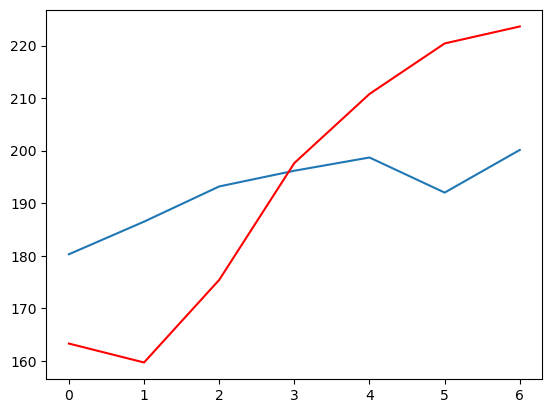

In [69]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

X = (df_open).values
train, test = X[1:len(X)-7], X[len(X)-7:]

#train autoregression
model = AutoReg(train, lags = 490)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

#make predictions
predictions = model_fit.predict(start = len(train), end = len(train) + len(test) -1, dynamic = False)
for i in range(len(predictions)):
    print('predicted = %f, expected = %f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#plot the results
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()

The predictions (red) are about 15 points out each day, with a huge deviation on day 5. 

### Now, let's try the same thing for closing prices

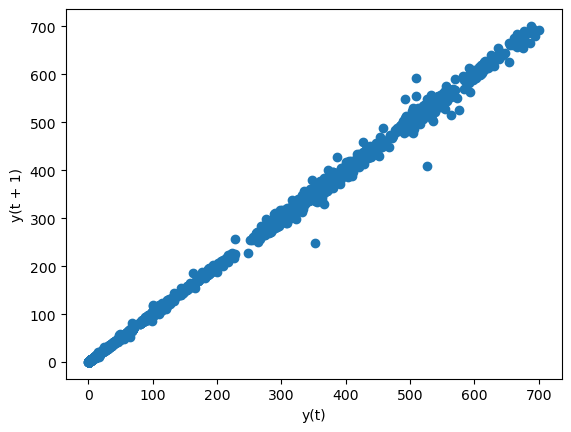

          t-1       t+1
t-1  1.000000  0.999587
t+1  0.999587  1.000000


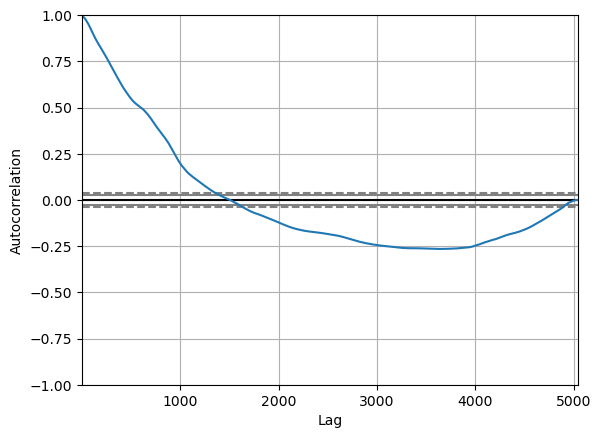

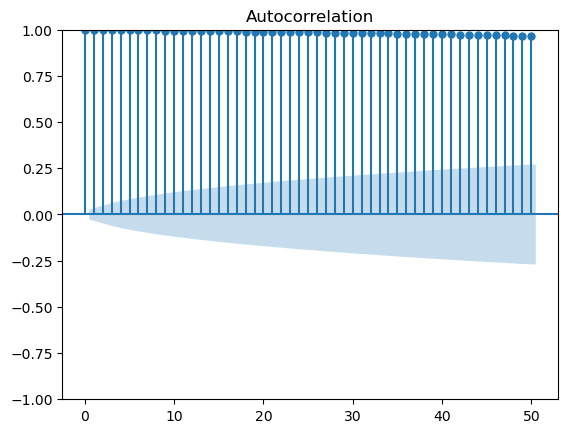

Test MSE: 12.558


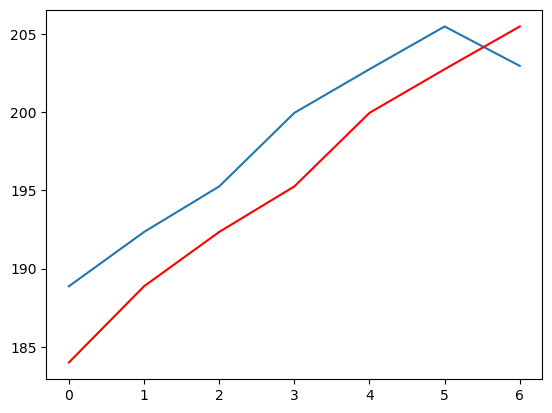

Coefficients: [ 8.80335942e-02  1.13066402e+00 -1.61653898e-01  8.06205789e-02
 -1.58539645e-02 -4.76342819e-02 -2.34820645e-02 -2.39479402e-02
  6.27688257e-02  1.60770302e-02  1.38134098e-02 -4.44305230e-02
  7.81052005e-02 -5.47237173e-02  1.41585555e-02 -4.07741000e-02
  4.11868122e-02  2.11576512e-02 -6.90071030e-02  5.71025958e-02
 -3.80885652e-02  1.26867750e-02 -4.81197403e-02  1.35191599e-02
  5.18456270e-02  8.45333276e-04 -1.29709752e-02 -6.69363004e-02
  7.61479210e-02 -3.77778875e-02  1.98545796e-02 -1.32481753e-02
  2.50785746e-02  4.54750063e-02 -6.52257691e-02 -1.03524929e-02
  1.32867936e-02  1.51463088e-03  5.43353038e-03  2.49294486e-02
 -4.70129436e-03 -1.17825461e-01  1.45108391e-01 -4.89306633e-02
 -5.27535984e-02  4.08215533e-02  4.13276505e-02 -3.51436564e-02
 -2.17751579e-02  1.10014038e-03  7.06988931e-02 -2.60759420e-02
 -1.96873466e-02 -3.50810423e-02  4.60171783e-02 -5.56130733e-03
 -4.94906295e-03  2.77168202e-03 -1.05566278e-02  1.37601902e-02
  1.0195455

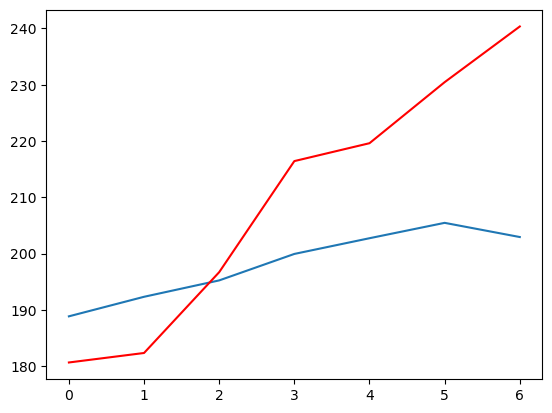

In [70]:
df_close = df.iloc[:, 1] #slice dataframe to give only "open" stock prices
(df_close).head() #view if did the above correctly
#view dataset

from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(df_close)
pyplot.show() #run opening prices (t) on x-axis against opening prices on previous dat (t-1) on y-axis
#check correlation now

from pandas import DataFrame
from pandas import concat
values = DataFrame((df_close).values)
dataframe = concat([values.shift(1), values], axis = 1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_close)
pyplot.show()
#check seasonality now

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_close, lags = 50)
pyplot.show()

from sklearn.metrics import mean_squared_error

#create the lagged dataset
values = DataFrame((df_close).values)
dataframe = concat([values.shift(1), values], axis = 1)
dataframe.columns = ['t-1', 't+1']

#split into training and testing sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_Y = train[:,0], train[:,1]
test_X, test_Y = test[:,0], test[:,1]

#persistence model
def model_persistence(x):
    return x

#walk-forward validation
predictions = list()
for x in test_X:
    y_hat = model_persistence(x)
    predictions.append(y_hat)
test_score = mean_squared_error(test_Y, predictions)
print('Test MSE: %.3f' % test_score)

#plot predictions vs expected
pyplot.plot(test_Y)
pyplot.plot(predictions, color = 'red')
pyplot.show()
#persistence model

from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

X = (df_close).values
train, test = X[1:len(X)-7], X[len(X)-7:]

#train autoregression
model = AutoReg(train, lags = 490)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

#make predictions
predictions = model_fit.predict(start = len(train), end = len(train) + len(test) -1, dynamic = False)
for i in range(len(predictions)):
    print('predicted = %f, expected = %f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#plot the results
pyplot.plot(test)
pyplot.plot(predictions, color = 'red')
pyplot.show()
#autoreg model

The MSE is better than for open prices, but the deviation is quite high (about 40+ points).